# Entrega 4 - Aprendizaje no supervisado.

### Grupo 13:
     - J. Aguirre  C.I: 4.773.509-6
     - A. Collazo C.I: 4.455.617-4
     - G. Núnez C.I: 4.785.081-2

## 1. Objetivo

El principal objetivo de esta tarea es implementar y aplicar métodos de aprendizaje no supervisado a un conjunto de datos de alta dimensionalidad para encontrar patrones. El corpus a utilizar es _Aquienvoto.uy_ proporcionado por el equipo docente. Se aplicará el método _Principal Component Analysis_ (en adelante llamado _PCA_) y el algoritmo _K-means_.

En la primera parte se utilizará el método _PCA_ para reducir las dimensiones del conjunto de datos y lograr una visualización exploratoria. A partir de este resultado se determinará si los partidos políticos de Uruguay agrupan votantes con respuestas similares.

En la segunda parte se aplicará el algoritmo _K-means_ para agrupar los datos según los votantes de cada partido. Se experimentará con distintas cantidades predefinidas de clusters (2, 3, 5, 10 y 11), y además, se utilizará el coeficiente de _Silhouette_ y _Adjusted Rand Index_ (en adelante llamado _ARI)_ para evaluar los resultados.

## 2. Diseño

En la siguiente sección se mencionan las decisiones de diseño utilizadas para la construcción de cada una de las partes del presente laboratorio.

### 2.1 Principal Component Analysis (PCA)

Como se mencionó anteriormente, el corpus a utilizar es _Aquienvoto.uy_ proporcionado por el equipo docente. Cada instancia del conjunto de datos consta de 29 columnas detalladas a continuación.

La primera columna representa el identificador de la instancia, la segunda columna representa el identificador del candidato político, las siguientes 26 columnas (es decir, desde la tercera hasta la vigésima octava) representan cada una de las respuestas proporcionadas por el votante, y la última columna, corresponde a la fecha de generación de la instancia. Para implementar _PCA_ no se tendrá en cuenta ni la fecha de generación de la instancia ni el identificador ya que no resultan relevantes.

El primer paso consiste en cargar el conjunto de datos. Como se mencionó anteriormente, la primer y última columna son descartadas desde el inicio. Una vez cargadas todas las instancias se ordenan según el identificador del candidato político, y luego, se elimina dicha columna para conservar únicamente las 26 respuestas proporcionadas por el votante. El siguiente paso consiste en trasponer la matriz puesto que se operará por filas y no por columnas. Notar que ahora la fila 1 de la matriz contiene todas las respuestas relacionadas la pregunta 1, la fila 2 a la pregunta 2, y así respectivamente. A continuación, se reescalan los valores de la matriz restando la media a cada una de las dimensiones para centrar los datos en el origen.

Para medir cómo se relacionan las dimensiones entre sí se calcula la matriz de covarianza, y con ella, se calcula también los vectores y valores propios. Los vectores propios de la matriz de covarianza indican cuánto varían los datos en la dirección correspondiente. El vector propio con el mayor valor propio es el componente principal de la matriz, es decir, la dirección en la que los datos están más dispersos.

Para graficar las instancias en $x$ dimensiones se realiza un cambio de base para expresar cada instancia como una combinación lineal de las $x$ dimensiones principales, es decir, los $x$ vectores propios con mayor valor propio. Por último, se multiplica la matriz por los vectores propios (en columna) obteniendo como resultado una matriz con tantas filas como instancias tiene el conjunto de datos y $x$ cantidad de columnas.

### 2.2 K-means

La implementación del algoritmo K-means fue organizada en un único módulo. El algoritmo recibe como entrada la cantidad de clusters a construir y el conjunto de datos, e imprime los clusters obtenidos, la cantidad de iteraciones realizadas, el coeficiente de Silhouette y la medida ARI obtenida. Estos últimos dos valores se utilizan para realizar la evaluación del agrupamiento, siendo el primero una técnica de validación interna y la segunda una técnica de validación externa. La principal diferencia entre ambos tipos de validación radica en el hecho de si se usa o no, información que no es producto de la técnica de agrupación utilizada. Las técnicas de validación interna utilizan únicamente la información de los datos para medir el agrupamiento, mientras que las técnicas de validación externa miden la calidad de los datos obtenidos en base a información que no es propia de los datos, sino que está definida de antemano. 
Las métricas de validación interna en general buscan medir la cercanía que existe entre elementos de un mismo cluster, y la distancia entre elementos de clusters distintos. El coeficiente de Silhouette mide la consistencia dentro de un cluster, es decir la cohesión entre una instancia y el cluster al que pertenece, y la diferencia a otro (en particular al más cercano). Dado un punto x del conjunto de datos, se determina la distancia promedio de x a todos los demás puntos del cluster (denotemos $a(x)$). Por otro lado, se considera la distancia de x hacia todos los puntos del cluster más cercano (denotemos $b(x)$). Luego, el coeficiente de Silhouette para x se define como $S(x) = \frac{b(x) - a(x)}{max\{b(x), a(x)\}}$. El valor de $S(x)$ varía entre -1 y 1, donde -1 representa un mal agrupamiento y 1 un buen agrupamiento.
En cuanto a la medida ARI, se prefiere sobre RI (de hecho, es un ajuste de ésta) por su comportamiento estable. RI considera como éxito pares de elementos que o bien coinciden en ambos clustering, o difieren, por lo que se ve afectado de forma aleatoria al incrementar suficientemente la cantidad de clusters. Dado que ARI no trabaja sobre puntos sino pares de clusters, no sufre este inconveniente.
En esta realidad, dicha medida es aplicada para el caso de once clusters, ya que de lo contrario la diferencia en cantidad de clusters será baja por definición, sin aportar valor de análisis.
La implementación del algoritmo es directa. En primera instancia se inicializan los centroides de forma aleatoria y se agrupan las instancias en base a los centroides más cercanos a cada una de ellas, configurando así los cluster iniciales. La distancia utilizada es la distancia euclidiana. Luego de esto comienza el paso iterativo en el cual en cada paso se recalcula la posición de los centroides y se vuelven a generar los n cluster en base a la nueva posición de los mismos. El algoritmo continúa hasta que converge o se llega al límite de iteraciones. Para esta implementación se estableció el número máximo de iteraciones del algoritmo en el valor 999. El algoritmo k-means es sensible a la elección inicial de los centroides, es decir que la elección de estos tiene un fuerte impacto en la calidad de los resultados obtenidos. Dado que es un algoritmo de búsqueda local, no se garantiza encontrar el óptimo global. Para mitigar este problema los centroides fueron inicializados diez veces para cada valor de n. Los resultados pueden verse en la siguiente sección.

## 3. Experimentación

### 3.1 Experimentación con PCA

Se pretende analizar las instancias del conjunto de datos desde una perspectiva visual para determinar si los partidos políticos de Uruguay agrupan votantes con respuestas similares. En una primera aproximación se decidió utilizar el método _PCA_ para reducir las 26 dimensiones a tan solo 3, y así, poder graficar dichas instancias. Los valores propios obtenidos en el proceso se visualizan a continuación.

[**19.054**,  **3.385**,  **2.881**,  2.418,  2.1,  1.985,  1.937,  1.605, 0.571,  1.486,  0.667,  1.406,  1.358,  1.284,  0.784,  1.228, 0.83,  0.86,  0.882,  1.166,  1.139,  1.11 ,  1.059,  1.005, 0.959,  0.974]

Notar que los tres valores propios más grandes están asociados a la pregunta 1, 2 y 3 en ese orden; por lo tanto, se utilizaron los vectores propios asociados a los tres valores propios antedichos para transformar las instancias al nuevo subespacio. Tanto en _Gráfica 1_ como en _Gráfica 2_ se puede visualizar el resultado.

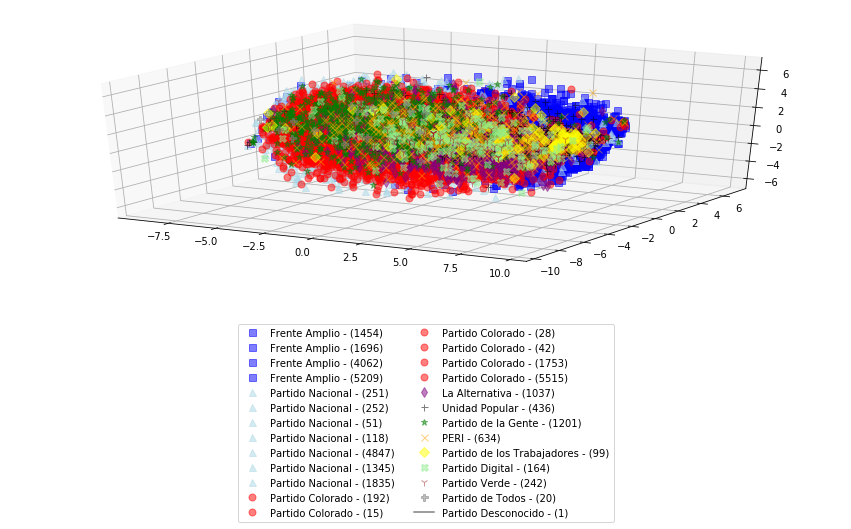

In [7]:
%run a/PCA.py "a/data.csv" 3 1

_Gráfica 1: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy según las tres direcciones de mayor varianza, es decir, la dimensión 1, 2 y 3._

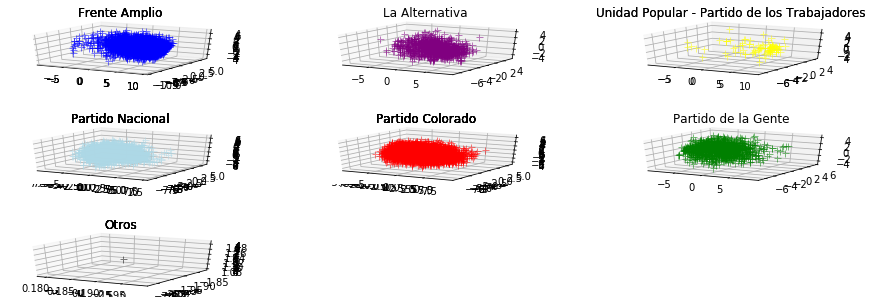

In [2]:
%run a/PCA.py "a/data.csv" 3 0

_Gráfica 2: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy discriminadas por partido político según las tres direcciones de mayor varianza, es decir, la dimensión 1, 2 y 3._

Analizando las gráficas parecería que los distintos partidos políticos se solapan entre sí, por lo que dada la dificultad para determinar si existe una discriminación evidente, se decidió eliminar otra dimensión y graficar tan solo en 2 dimensiones. Utilizando entonces los dos vectores propios asociados a los valores propios más grandes, es decir, los asociados a la pregunta 1 y 2 en ese orden, se obtuvieron las siguientes gráficas.

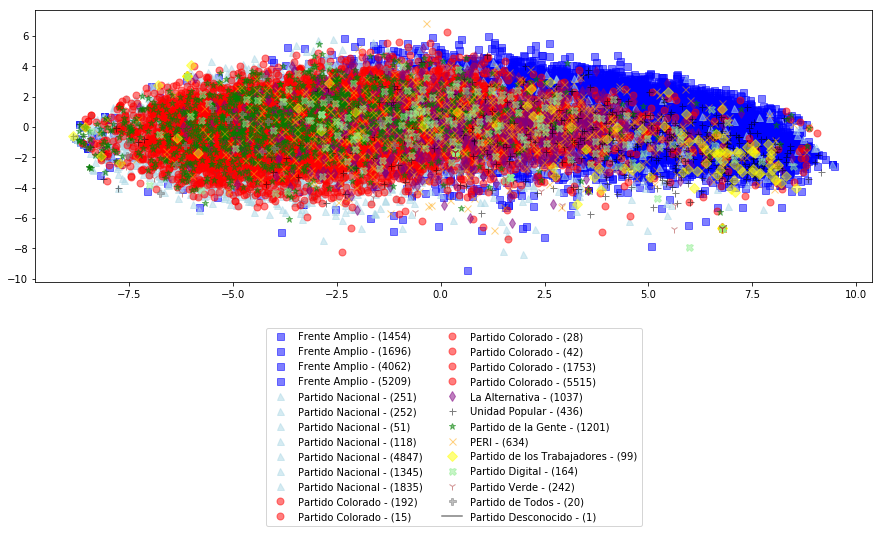

In [3]:
%run a/PCA.py "a/data.csv" 2 1

_Gráfica 3: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy según las dos direcciones de mayor varianza, es decir, la dimensión 1 y 2._

c:\users\joaco\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


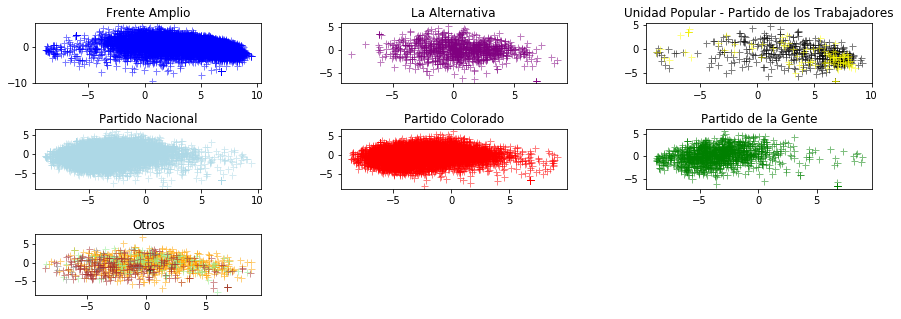

In [4]:
%run a/PCA.py "a/data.csv" 2 0

_Gráfica 4: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy discriminadas por partido político según las dos direcciones de mayor varianza, es decir, la dimensión 1, y 2._

Nuevamente resulta difícil determinar si existe alguna discriminación evidente entre los partidos políticos, pero todo parece indicar que muchos de ellos se solapan entre sí. Al ver los valores propios se observa que uno de ellos es mucho mayor que los otros, así que puede tener sentido ver qué sucede si se reduce una dimensión más. A continuación, se visualiza las instancias graficadas según la dirección de mayor varianza.

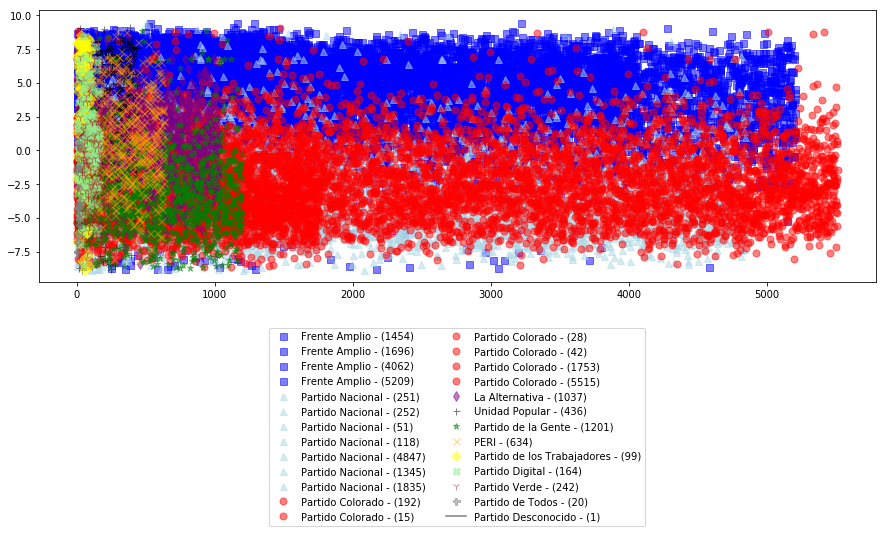

In [5]:
%run a/PCA.py "a/data.csv" 1 1

_Gráfica 5: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy según la dirección de mayor varianza, es decir, la dimensión 1._

c:\users\joaco\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


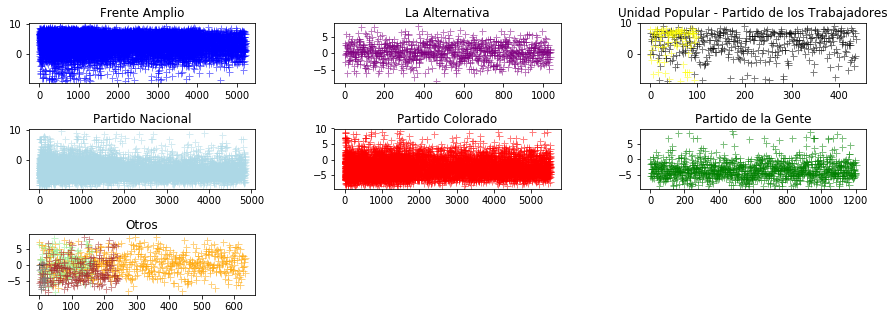

In [6]:
%run a/PCA.py "a/data.csv" 1 0

_Gráfica 6: se visualiza la dispersión de todas las instancias del corpus Aquienvoto.uy discriminadas por partido político según la dirección de mayor varianza, es decir, la dimensión 1._

### 3.2 Experimentación con K-means

En primera instancia se presentan los valores obtenidos para el coeficiente de Silhouette. Además se presenta la distribución de los clusters obtenidos en cada caso.

En todos los casos se puede apreciar que el algoritmo converge antes de alcanzar el límite de iteraciones permitidas. Además, para pruebas de un mismo n, la distribución de los clusters no difiere significativamente en comparación a los resultados obtenidos en cada prueba para dicho n.
Respecto a la cohesión entre instancias y clusters a los que pertenecen y la diferencia a los que no, el coeficiente Silhouette se desempeña mejor sobre menos clusters, de igual modo, el incremento de clusters predefinidos genera peores resultados (más bajos) en la métrica. Esto ocurre por la superposición de respuestas entre votantes de distintos candidatos, e incluso superposición entre partidos políticos. 
Para el caso de once clusters se incluye el valor de la medida ARI para realizar una validación externa. Los resultados obtenidos son los siguientes:

Siguiendo la línea del análisis anterior, el resultado de la medida ARI (como puede verse en la imágen con la distribución de los once clusters) no logra un desempeño tan aceptable debido a la superposición de los datos explicada en el punto anterior.

## 4. Conclusiones

## 5. Apéndice

## Referencias

**[1]**